<a href="https://colab.research.google.com/github/cabamarcos/Grupo27_practica2/blob/main/Grupo27_practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importación de librerías y datos

Hacemos los imports correspondientes



In [71]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import time


import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

#preprocessing
from sklearn import preprocessing
from sklearn.compose import make_column_selector as selector
from sympy import *
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#traintest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [72]:
with open('attrition_available_27.pkl', 'rb') as archivo:
    datos = pickle.load(archivo)

print(datos)

           hrs  absences  JobInvolvement  PerformanceRating  \
1     7.315971      13.0             2.0                4.0   
6     6.450877      17.0             3.0                4.0   
13    8.871421      14.0             2.0                3.0   
28         NaN       6.0             2.0                3.0   
30    9.662808      11.0             2.0                3.0   
...        ...       ...             ...                ...   
4405  8.316921       6.0             3.0                3.0   
4406  5.897197       NaN             2.0                3.0   
4407       NaN      18.0             3.0                4.0   
4408  9.187612       NaN             2.0                3.0   
4409  6.511790      17.0             4.0                3.0   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance   Age  \
1                         3.0              2.0              4.0  31.0   
6                         1.0              3.0              1.0   NaN   
13                      

#2. EDA

## Visualización

Convertimos los datos en un dataframe

In [73]:
df = pd.DataFrame(datos)

Sacamos el número de instancias y el número de atributos

In [74]:
print("Número de instancias:", len(df))
print("Número de atributos:", len(df.columns))

Número de instancias: 4410
Número de atributos: 31


Vemos el tipo de datos de las instacias

In [75]:
print("Tipos de datos:")
print(df.dtypes)


Tipos de datos:
hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount              float64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike          float64
StandardHours                int64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
Year

Podemos ver que la mayoría de datos son float, pero también observamos objetos y números enteros

## Datos constantes

Queremos ver si tenemos alguna columna con datos constantes

In [76]:
columnas_constantes = []
for columna in df.columns:
    if df[columna].nunique() == 1:
        columnas_constantes.append(columna)

if len(columnas_constantes) > 0:
    print("Las siguientes columnas tienen datos constantes:")
    print(columnas_constantes)
else:
    print("No hay columnas con datos constantes.")

Las siguientes columnas tienen datos constantes:
['EmployeeCount', 'Over18', 'StandardHours']


Podemos ver que tenemos 3 coloumnas con satos constantes:
 - EmployeeCount: Número de empleados en la compañía.
 - Over18: Si los empleados son mayores de 18.
 - StandardHours: El número estándar de horas de trabajo en la empresa.

Esto es bastante logico, ya que "EmployeeCount" indica el numero de empleados en la compañía, y este, en el momento de sacar los datos, no varía. Podría variar si se vuelven a sacar los datos x días después.

"Over18", es normal que tenga valores ctes, ya que es un objeto que puede ser o mayor o menor de 18, y sería muy raro que alguien estuviera trabajando en una empresa con menos de 18 años.

Finalmente "StandardHours" como dice su propio nombre, es el número estandar de horas trabajadas en la compañía. Al ser un número estandar, no es personalizado por lo que siempre es el mismo.

Vamos a ver cual es el dato que se repite en cada una de ellas

In [77]:
print("Primer dato de la columna 'EmployeeCount':", df['EmployeeCount'][0])
print("Primer dato de la columna 'Over18':", df['Over18'][0])
print("Primer dato de la columna 'StandardHours':", df['StandardHours'][0])

Primer dato de la columna 'EmployeeCount': 1.0
Primer dato de la columna 'Over18': Y
Primer dato de la columna 'StandardHours': 8


Vamos a comprobar si esto es cierto

In [78]:
print("Datos de la columna 'EmployeeCount':")
print(df['EmployeeCount'])

print("\nDatos de la columna 'Over18':")
print(df['Over18'])

print("\nDatos de la columna 'StandardHours':")
print(df['StandardHours'])

Datos de la columna 'EmployeeCount':
1       1.0
6       1.0
13      1.0
28      1.0
30      1.0
       ... 
4405    NaN
4406    NaN
4407    1.0
4408    1.0
4409    NaN
Name: EmployeeCount, Length: 4410, dtype: float64

Datos de la columna 'Over18':
1         Y
6         Y
13        Y
28        Y
30      NaN
       ... 
4405      Y
4406      Y
4407      Y
4408      Y
4409      Y
Name: Over18, Length: 4410, dtype: object

Datos de la columna 'StandardHours':
1       8
6       8
13      8
28      8
30      8
       ..
4405    8
4406    8
4407    8
4408    8
4409    8
Name: StandardHours, Length: 4410, dtype: int64


Podemos ver que esto es cierto, pero que hay datos que faltan.

Vamo a visualizar mejor los datos con unas gráficas.

<Axes: >

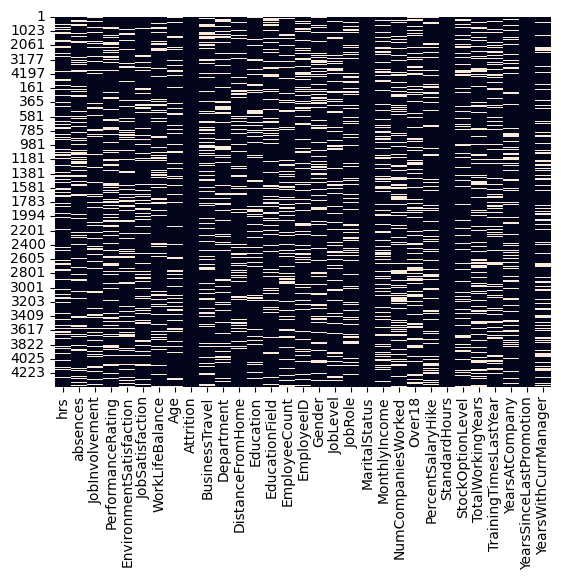

In [79]:
#Mapa de calor con los valores nulos
sns.heatmap(datos.isnull(), cbar=False)

<Axes: >

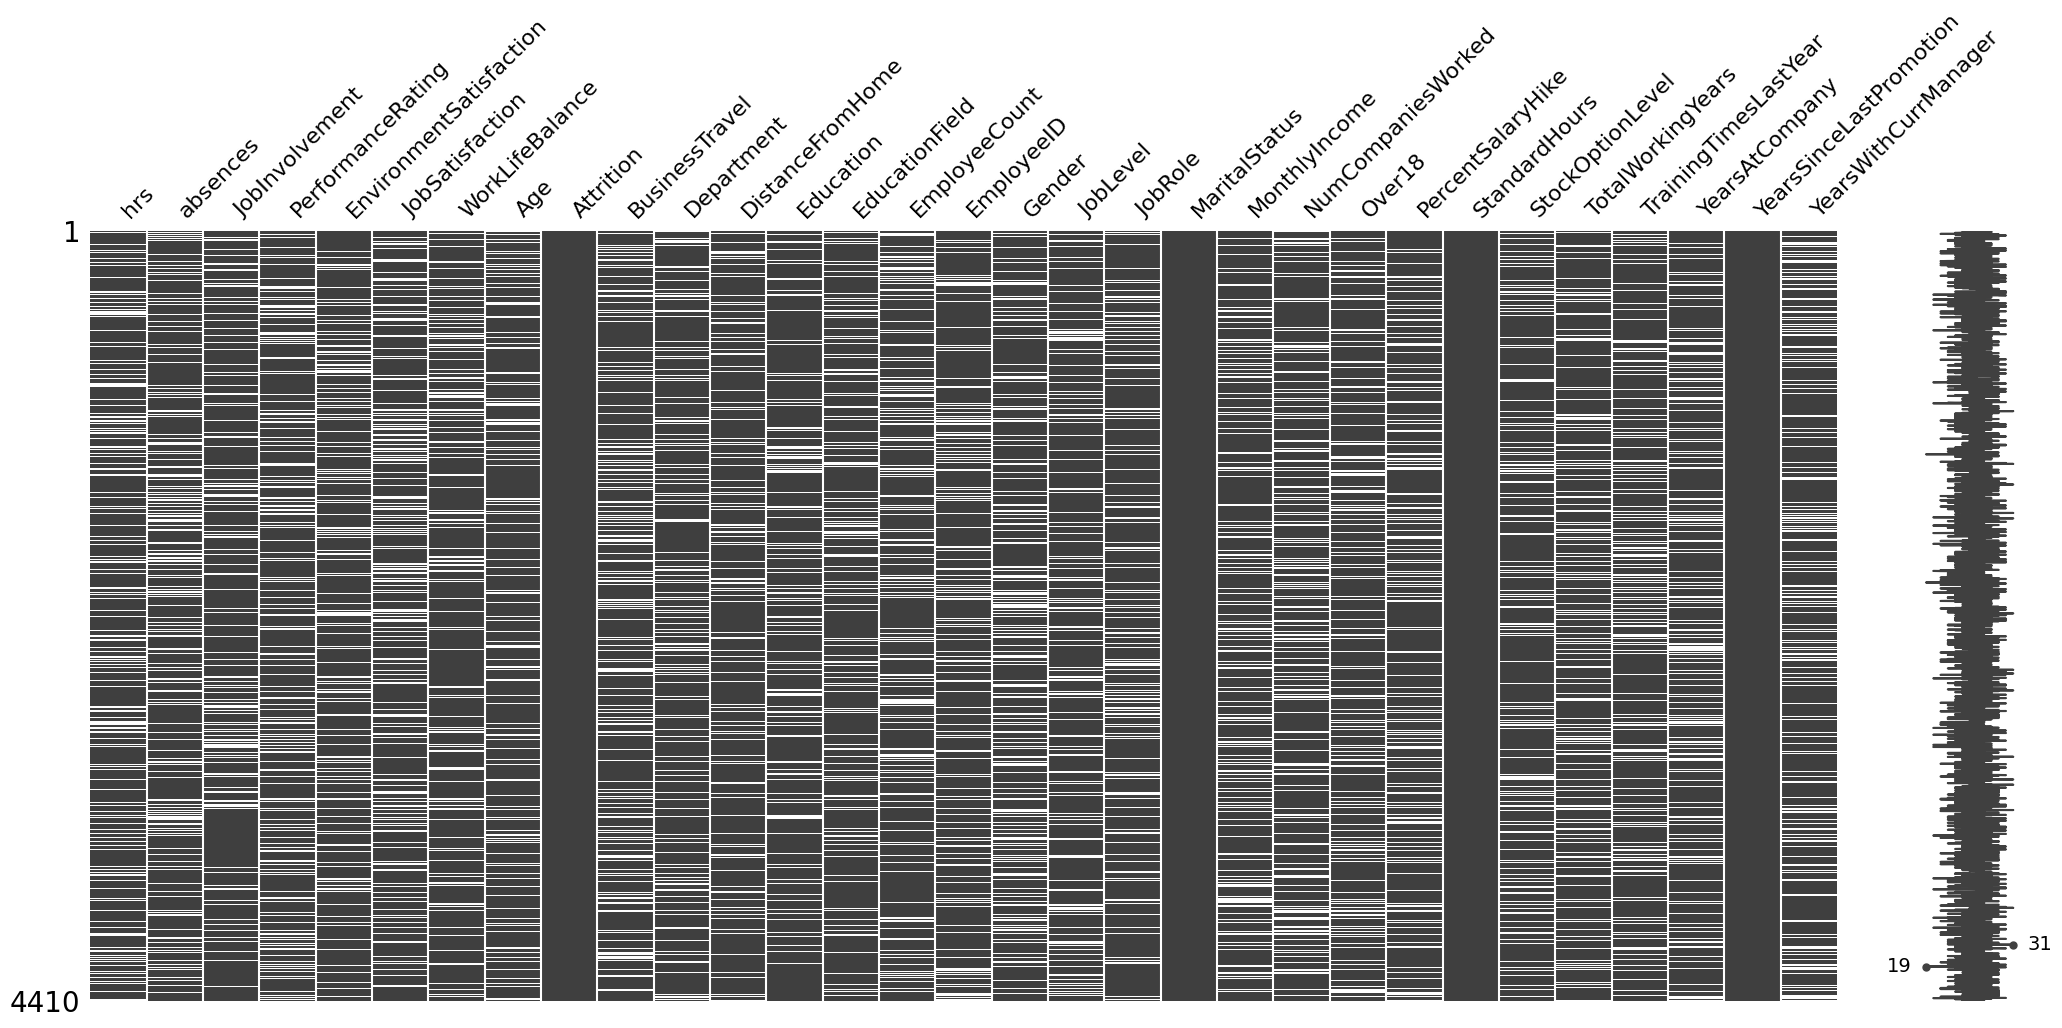

In [80]:
msno.matrix(datos)

Gracias a estas gráficas y los datos recogidos anteriormente, podemos ver visualmente que hay 4 atributos incluyendo la variable de salida que no cambian sus valores para todas sus instancias, esto significa que está muy desbalanceado.

## Datos nulos

Vamos a comprobar el numero total de datos nulos en cada columna.

In [81]:
nulos_por_columna = df.isnull().sum()
porcentaje_nulos_por_columna = (nulos_por_columna / len(df)) * 100

for columna in df.columns:
    print(f"'{columna}': {nulos_por_columna[columna]}, {porcentaje_nulos_por_columna[columna]:.2f}%")

'hrs': 905, 20.52%
'absences': 891, 20.20%
'JobInvolvement': 718, 16.28%
'PerformanceRating': 919, 20.84%
'EnvironmentSatisfaction': 879, 19.93%
'JobSatisfaction': 948, 21.50%
'WorkLifeBalance': 769, 17.44%
'Age': 736, 16.69%
'Attrition': 0, 0.00%
'BusinessTravel': 849, 19.25%
'Department': 782, 17.73%
'DistanceFromHome': 747, 16.94%
'Education': 715, 16.21%
'EducationField': 710, 16.10%
'EmployeeCount': 822, 18.64%
'EmployeeID': 796, 18.05%
'Gender': 932, 21.13%
'JobLevel': 782, 17.73%
'JobRole': 782, 17.73%
'MaritalStatus': 0, 0.00%
'MonthlyIncome': 929, 21.07%
'NumCompaniesWorked': 936, 21.22%
'Over18': 924, 20.95%
'PercentSalaryHike': 788, 17.87%
'StandardHours': 0, 0.00%
'StockOptionLevel': 708, 16.05%
'TotalWorkingYears': 898, 20.36%
'TrainingTimesLastYear': 887, 20.11%
'YearsAtCompany': 956, 21.68%
'YearsSinceLastPromotion': 0, 0.00%
'YearsWithCurrManager': 895, 20.29%


Se puede observar que en ciertas columnas no hay ni un solo missing value, mientras que en otras, el % de missing values puede llegar hasta el 0,21%, más de un quinto de los datos faltan.


## Tipo de problema

Podría tratarse de un problema de regresión por lo que nos piden en el enunciado, pero podemos ver que la variable de salida no es contínua, por lo que no podemos garantizar que se pueda llevar a cabo.

Dadas las circunstancias podemos ver que el problema sería de clasificación binaria, en la que la variable de salida 'Attrition' nos muesta si los empleados abandonan o no la empresa

## ¿Problema desbalanceado?


Se trata de un problema desbalanceado, ya que la variable de salida se encuentra desbalanceada, ya que hay una variable mayoritaria en este atributo, como podemos ver en las gráficas anteriores.

Además, las instancias de los diferentes atributos no son las mismas en cada uno de ellos, hay atributos con clases mayoritarias que contienen más datos y otras menos, pero también hay atributos que tienen demasiados missing values.

Para tratarlo vamos a ver varios métodos que estudiaremos en los siguientes apartados.

# División de datos

Dividiremos los datos en un conjunto train para poder entrenar y ajustar hiper-parámetros, y un conjunto de test para evaluar.

Cabe destacar, que para prblemas de clasificacion desbalanceados, hay que usar particiones estratificadas y médidas adecuadas. También es conveniente que los métodos de construcccion de modelos traten el desbalanceo usando el parametro class_weight = "balanced".

In [82]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X = df.drop('Attrition', axis=1)

y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.16666666666666667)

Vamos a realizar un preprocesado de los datos ya divididos para poder entrenar bien con los modelos que relizaremos en los próximos apartados.

Para rellenar los valores faltantes, vamos a utilizar knn imputer en la columnas necesarias y a la hora de poder convertir variables categóricas en caracterísiticas numéricas binarias para que puedan ser utilizadas por los algoritmos de aprendizaje. Vamos a usar one hot encoder.

In [84]:
categorical_cols = ['BusinessTravel','Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

#one hot encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X_train[categorical_cols])
train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]).toarray())
test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]).toarray())

#Eliminar las columnas originales
train_df = X_train.drop(categorical_cols, axis = 1)
test_df = X_test.drop(categorical_cols, axis = 1)

#Concatenar los df codificados y no codificados
X_train2 = pd.concat([train_df.reset_index(drop=True), train_encoded], axis=1)
X_test2 = pd.concat([test_df.reset_index(drop=True), train_encoded], axis=1)

#mostrar el resultado
print(X_train2.info())
print(X_test2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2912 non-null   float64
 1   absences                 2936 non-null   float64
 2   JobInvolvement           3083 non-null   float64
 3   PerformanceRating        2905 non-null   float64
 4   EnvironmentSatisfaction  2933 non-null   float64
 5   JobSatisfaction          2880 non-null   float64
 6   WorkLifeBalance          3036 non-null   float64
 7   Age                      3069 non-null   float64
 8   DistanceFromHome         3044 non-null   float64
 9   Education                3069 non-null   float64
 10  EmployeeCount            2987 non-null   float64
 11  EmployeeID               3007 non-null   float64
 12  JobLevel                 3013 non-null   float64
 13  MonthlyIncome            2898 non-null   float64
 14  NumCompaniesWorked      

In [86]:
print(X_train2.columns)


Index([          'StandardHours', 'YearsSinceLastPromotion',
                               0,                         1,
                               2,                         3,
                               4,                         5,
                               6,                         7,
                               8,                         9,
                              10,                        11,
                              12,                        13,
                              14,                        15,
                              16,                        17,
                              18,                        19,
                              20,                        21,
                              22,                        23,
                              24,                        25,
                              26,                        27,
                              28,                        29,
                        

In [85]:
missing_val_cols =['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction',
'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education','EmployeeCount', 'EmployeeID', 'JobLevel', 
'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 
'TrainingTimesLastYear', 'YearsAtCompany', 'YearsWithCurrManager']

#creamos el imputador
imputer = KNNImputer(n_neighbors = 10)
X_train_imputed = imputer.fit_transform(X_train2[missing_val_cols])
X_test_imputed = imputer.transform(X_test2[missing_val_cols])

X_train_imputed2 = pd.DataFrame(X_train_imputed, columns = missing_val_cols)
X_test_imputed2 = pd.DataFrame(X_test_imputed, columns = missing_val_cols)

#Eliminamos columnas
X_train2 = X_train2.drop(missing_val_cols, axis=1)
X_test2 = X_test2.drop(missing_val_cols, axis=1)

#concatenar las columnasimputadas con las columnas originales
X_trainf = pd.concat([X_train2, X_train_imputed2],axis = 1)
X_testf = pd.concat([X_test2, X_test_imputed2],axis = 1)

X_trainf.columns = X_trainf.columns.astype(str)
X_testf.columns = X_testf.columns.astype(str)

#resultado
print(X_trainf.info())
print(X_testf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3675 entries, 0 to 3674
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   StandardHours            3675 non-null   int64  
 1   YearsSinceLastPromotion  3675 non-null   int64  
 2   0                        3675 non-null   float64
 3   1                        3675 non-null   float64
 4   2                        3675 non-null   float64
 5   3                        3675 non-null   float64
 6   4                        3675 non-null   float64
 7   5                        3675 non-null   float64
 8   6                        3675 non-null   float64
 9   7                        3675 non-null   float64
 10  8                        3675 non-null   float64
 11  9                        3675 non-null   float64
 12  10                       3675 non-null   float64
 13  11                       3675 non-null   float64
 14  12                      